# Final Project Analysis

## Andrew Conrad, Van Mason

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('Basketball.csv')

In [3]:
df = df.drop("Unnamed: 0", axis = 1)

## Checking Residuals and MSE on train set

In [4]:
df

Name  Win  Loss   W/L%    GB   PS/G   PA/G   SRS  Rank  \
0        Philadelphia 76ers   49    23  0.681   0.0  113.6  108.1  5.28    14   
1             Brooklyn Nets   48    24  0.667   1.0  118.6  114.1  4.24     2   
2           Milwaukee Bucks   46    26  0.639   3.0  120.1  114.2  5.57     1   
3           New York Knicks   41    31  0.569   8.0  107.0  104.7  2.13    26   
4             Atlanta Hawks   41    31  0.569   8.0  113.7  111.4  2.14    11   
..                      ...  ...   ...    ...   ...    ...    ...   ...   ...   
621            Phoenix Suns   51    31  0.622   5.0   94.0   91.8  2.63    17   
622  Portland Trail Blazers   50    32  0.610   6.0   95.4   91.2  4.52    14   
623     Seattle SuperSonics   44    38  0.537  12.0   97.3   97.3  0.55     7   
624    Los Angeles Clippers   31    51  0.378  25.0   92.5   95.3 -2.23    20   
625   Golden State Warriors   17    65  0.207  39.0   92.5  101.5 -8.11    21   

      G  ...   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  Season  
0    72  ...  10.0  35.0  45.1  23.7  9.1  6.2  14.4  20.2  113.6  2021.0  
1    72  ...   8.9  35.5  44.4  26.8  6.7  5.3  13.5  19.0  118.6  2021.0  
2    72  ...  10.3  37.8  48.1  25.5  8.1  4.6  13.8  17.3  120.1  2021.0  
3    72  ...   9.7  35.5  45.1  21.4  7.0  5.1  12.9  20.5  107.0  2021.0  
4    72  ...  10.6  35.1  45.6  24.1  7.0  4.8  13.2  19.3  113.7  2021.0  
..   ..  ...   ...   ...   ...   ...  ...  ...   ...   ...    ...     ...  
621  82  ...  11.8  30.8  42.7  23.2  9.5  5.2  15.2  22.7   94.0  2001.0  
622  82  ...  11.7  30.3  42.0  23.9  8.2  5.1  15.3  21.3   95.4  2001.0  
623  82  ...  12.2  29.5  41.7  21.9  8.0  5.0  15.3  21.1   97.3  2001.0  
624  82  ...  11.7  31.2  42.9  19.3  6.0  6.3  15.8  21.6   92.5  2001.0  
625  82  ...  16.4  29.1  45.5  21.8  9.0  5.0  15.9  21.1   92.5  2001.0  

[626 rows x 33 columns]

To decide which features to choose for our training set we went with columns that were not entirely described by W/L%. We dropped columns such as games won and lost, Games Behind, Rank. We decided to use both the attempts and points scored, such as 2P(2 points scored) and 2PA (2 points attempted) columns instead of the percentages, because our data fit better that way. We also dropped features that had little to no impact on the training data such as PF (Personal Fouls) and Season.

In [5]:
current_year = df
current_year_short = current_year[["W/L%", "FG", "FGA", "3P", "3PA", "2P", "2PA", "FT", "FTA", "PTS", "ORB", "DRB", "TRB", "STL", "TOV"]]

In [6]:
X = current_year_short.drop(columns=['W/L%'])
Y = current_year_short['W/L%']
columns = X.columns
#scale features for coefficent later, using a robust scaler to reduce outliers
scaler = RobustScaler().fit(X)
X = scaler.transform(X)

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=6)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.3, random_state=6)
#linear regression scores based on the training set
reg = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)
print("Regression score on Train Set: " , reg.score(X_train, Y_train))
print("Regression score on Val Set: " , reg.score(X_val, Y_val))

Regression score on Train Set:  0.822153034725012
Regression score on Val Set:  0.7891973943685355


In [7]:
Y_pred = reg.predict(X_train)

In [8]:
print("Mean squared error on train set: " , mean_squared_error(Y_train, Y_pred, squared = False))

Mean squared error on train set:  0.06386470754937637


After finding pretty good scores on both the linear regression score and as well on mean squared error, we decided to look at the residuals of our predictions to see how they compared with the actual values we were looking for.

In [9]:
residuals = (Y_train - Y_pred)

In [10]:
residualFrame = Y_train
residualFrame = pd.DataFrame(residualFrame)
residualFrame["residuals"] = residuals
residualFrame["Y_pred"] = Y_pred

### Residuals not following clear pattern which good for our dataset

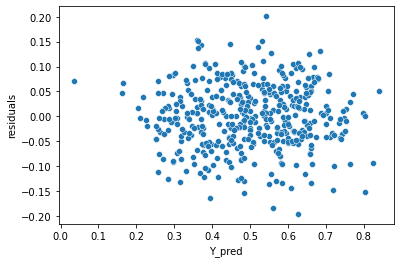

In [11]:
plot = sns.scatterplot(data = residualFrame, x = "Y_pred", y = "residuals")

### Clear pattern between our predicted values and our actual values of winrate

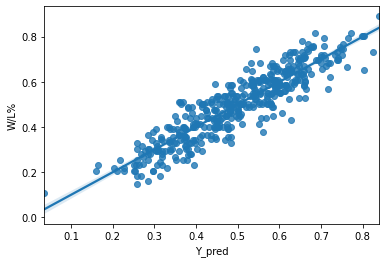

In [12]:
plot = sns.regplot(data = residualFrame, x="Y_pred", y = "W/L%")

### Low correlation between our actual win rate values and our residuals

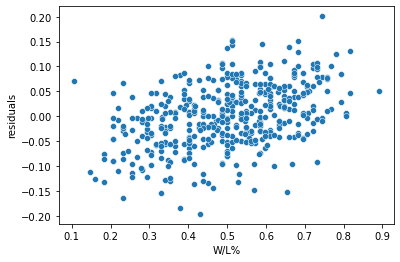

In [13]:
plot = sns.scatterplot(data = residualFrame, x = "W/L%", y = "residuals")

### Using our training set we can clearly see the most important factor of our chosen variables to affect win rate is PTs(Points scored), the next most important facotrs are FGA ( Field goals attempted) and 3P(3-Point field goals per game)

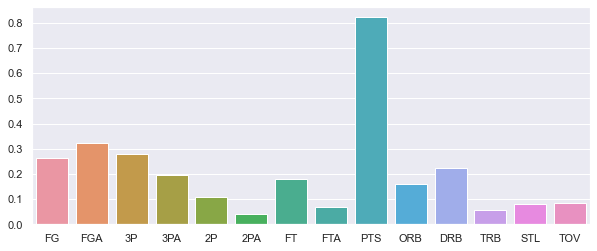

In [14]:
sns.set(rc={'figure.figsize':(10,4)})
plot = sns.barplot(x = columns, y = np.absolute(reg.coef_))

## Checking Residuals and MSE on Validation Set

In [15]:
print("Regression score on Val Set: " , reg.score(X_val, Y_val))

Regression score on Val Set:  0.7891973943685355


In [16]:
Y_pred = reg.predict(X_val)

In [17]:
print("Mean squared error on train set: " , mean_squared_error(Y_val, Y_pred, squared = False))

Mean squared error on train set:  0.06575666597219178


In [18]:
residuals = (Y_val - Y_pred)
residualFrame = Y_val
residualFrame = pd.DataFrame(residualFrame)
residualFrame["residuals"] = residuals
residualFrame["Y_pred"] = Y_pred

### Our residuals do not follow our predictions or our actual values which is excellent

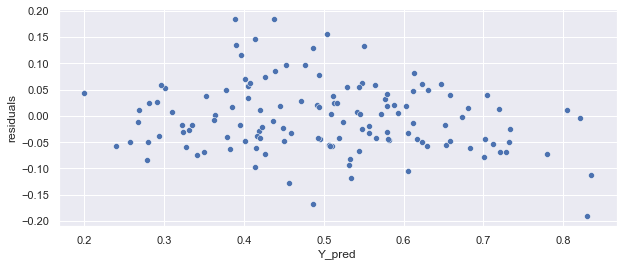

In [19]:
plot = sns.scatterplot(data = residualFrame, x = "Y_pred", y = "residuals")

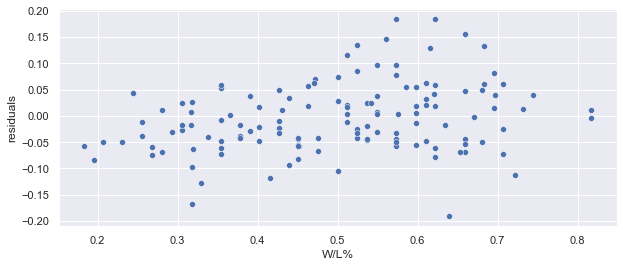

In [20]:
plot = sns.scatterplot(data = residualFrame, x = "W/L%", y = "residuals")

### Our validation set has a slightly worse fit than our training set, but the predictions are still linear

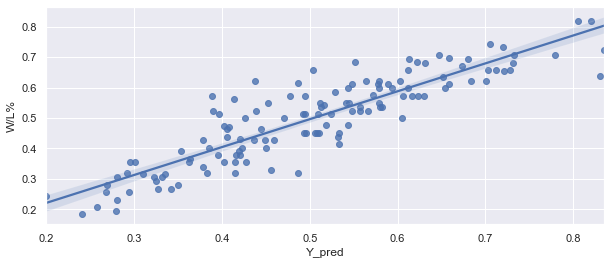

In [21]:
plot = sns.regplot(data = residualFrame, x="Y_pred", y = "W/L%")

## Checking Residuals and MSE on Test Set

In [22]:
print("Regression score on Test Set: " , reg.score(X_test, Y_test))

Regression score on Test Set:  0.8255738651749402


In [23]:
Y_pred = reg.predict(X_test)

In [24]:
print("Mean squared error on train set: " , mean_squared_error(Y_test, Y_pred, squared = False))

Mean squared error on train set:  0.06387800466513165


In [25]:
residuals = (Y_test - Y_pred)
residualFrame = Y_test
residualFrame = pd.DataFrame(residualFrame)
residualFrame["residuals"] = residuals
residualFrame["Y_pred"] = Y_pred

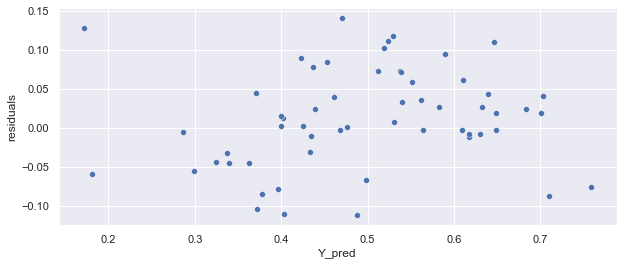

In [26]:
plot = sns.scatterplot(data = residualFrame, x = "Y_pred", y = "residuals")

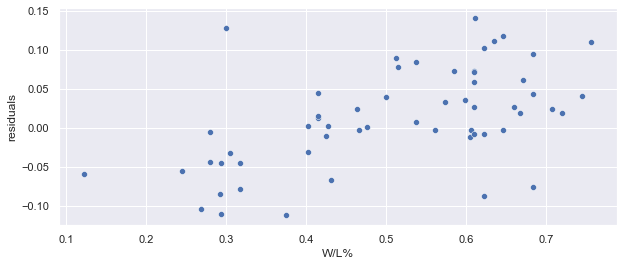

In [27]:
plot = sns.scatterplot(data = residualFrame, x = "W/L%", y = "residuals")

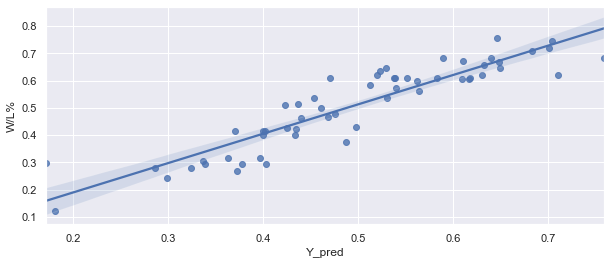

In [28]:
plot = sns.regplot(data = residualFrame, x="Y_pred", y = "W/L%")